In [1]:
pip install pandas-profiling;


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install  matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
import pandas_profiling as pf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 
from sklearn.metrics import r2_score
from sklearn import tree
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

C:\Users\user\AppData\Local\Temp\ipykernel_3856\3041840187.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pf


In [ ]:
##Exploratory Data Analysis  

In [9]:
tips = pd.read_excel('tips.xlsx')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


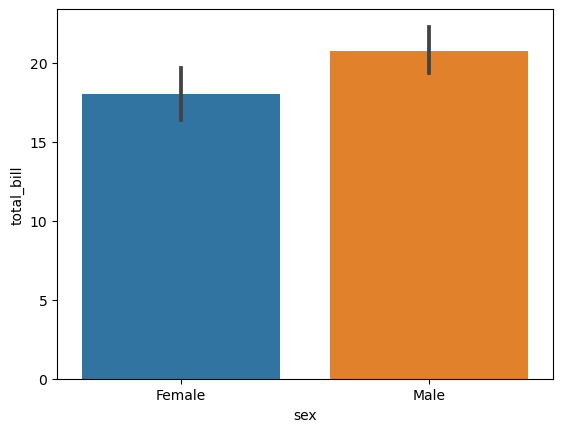

In [11]:
sns.barplot( data= tips ,x="sex",y="total_bill");

<AxesSubplot:xlabel='tip'>

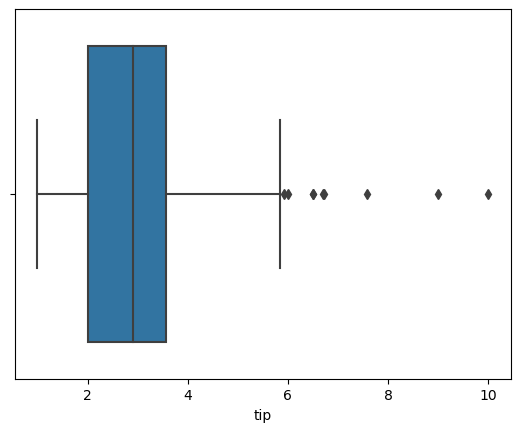

In [19]:
sns.boxplot(x=tips['tip'])

In [20]:
tips.shape

(244, 7)

In [21]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
pf.ProfileReport(tips)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [102]:
tips.drop_duplicates(inplace=True)

In [103]:
tips.groupby('day').sum().tip

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    169.83
Name: tip, dtype: float64

In [104]:
tips.groupby("sex").mean().tip

sex
Female    2.843140
Male      3.089618
Name: tip, dtype: float64

In [105]:
tips.groupby('sex').max().tip #tip min and tip max for female and male 

sex
Female     6.5
Male      10.0
Name: tip, dtype: float64

In [106]:
tips.groupby('sex').min().tip

sex
Female    1.0
Male      1.0
Name: tip, dtype: float64

In [107]:
tips.groupby('sex').mean().total_bill

sex
Female    18.115698
Male      20.744076
Name: total_bill, dtype: float64

In [108]:
tips.groupby('sex').max().total_bill

sex
Female    44.30
Male      50.81
Name: total_bill, dtype: float64

In [109]:
tips.groupby("sex").min().total_bill

sex
Female    3.07
Male      7.25
Name: total_bill, dtype: float64

In [110]:
tips.groupby('day').max().tip

day
Fri      4.73
Sat     10.00
Sun      6.50
Thur     6.70
Name: tip, dtype: float64

In [111]:
tips[tips.tip==max(tips.tip)]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [112]:
tips[tips.tip==min(tips.tip)]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1
92,5.75,1.0,Female,Yes,Fri,Dinner,2
111,7.25,1.0,Female,No,Sat,Dinner,1
236,12.60,1.0,Male,Yes,Sat,Dinner,2


In [113]:
tips.groupby('day').agg({'tip':['sum','min','max'] ,'total_bill':['sum','min','max'],'size':['sum','min','max']})

tip              total_bill              size        
         sum   min    max        sum   min    max  sum min max
day                                                           
Fri    51.96  1.00   4.73     325.88  5.75  40.17   40   1   4
Sat   260.40  1.00  10.00    1778.40  3.07  50.81  219   1   5
Sun   247.39  1.01   6.50    1627.16  7.25  48.17  216   2   6
Thur  169.83  1.25   6.70    1083.33  7.51  43.11  150   1   6

In [114]:
#Data Vizualization 

In [115]:
y=tips[["tip"]]

In [116]:
x=tips[['total_bill']]

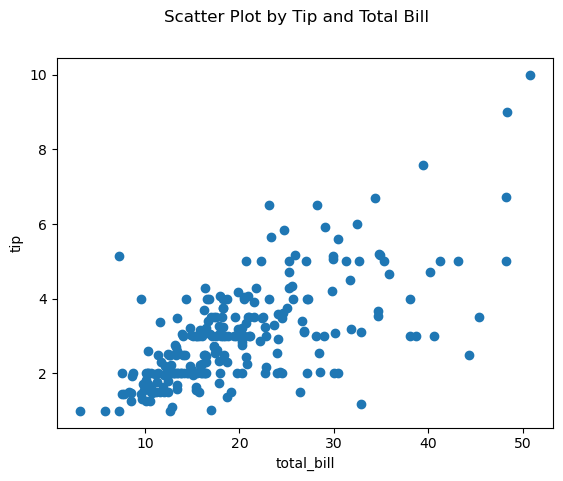

In [117]:

x=tips[['total_bill']]
y=tips[["tip"]]
ax=plt.scatter(x, y)
plt.suptitle('Scatter Plot by Tip and Total Bill')
plt.ylabel('tip');
plt.xlabel('total_bill');



In [118]:
x=tips[['size']]
y=tips[["tip"]]

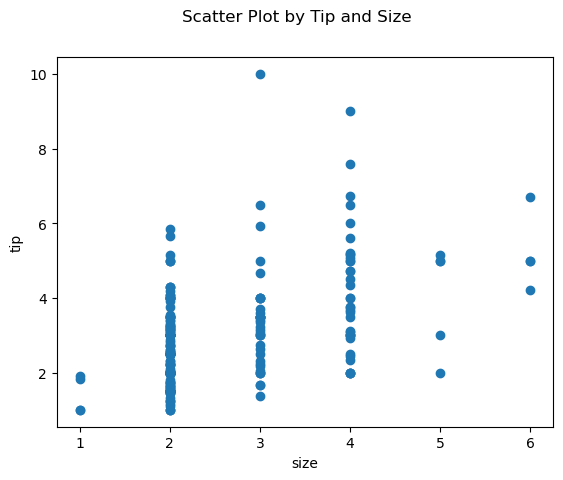

In [119]:
ax=plt.scatter(x, y)
plt.suptitle('Scatter Plot by Tip and Size')
plt.ylabel('tip');
plt.xlabel('size');

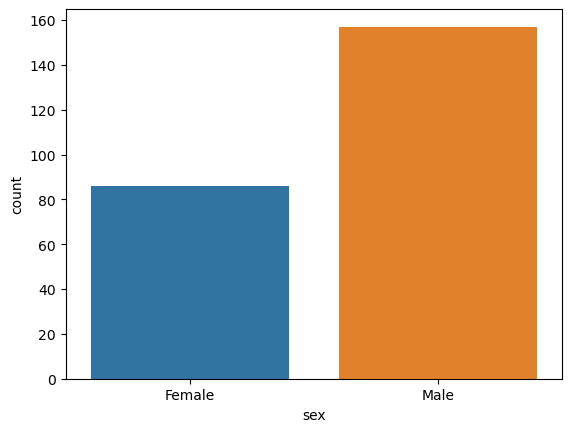

In [120]:
sns.countplot(x='sex', data=tips);


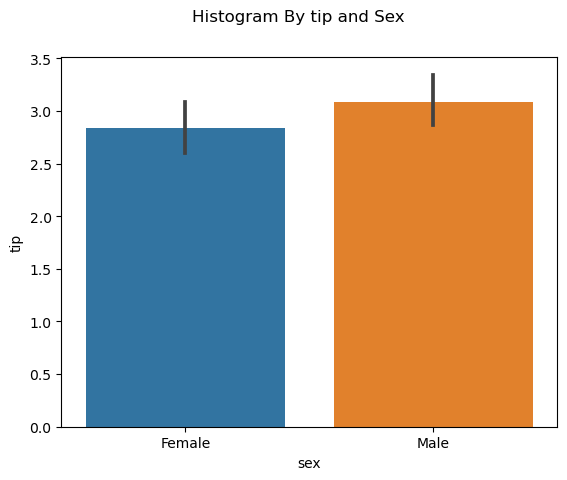

In [121]:
sns.barplot(x='sex', y='' , data=tips);
plt.suptitle('Histogram By tip and Sex ');


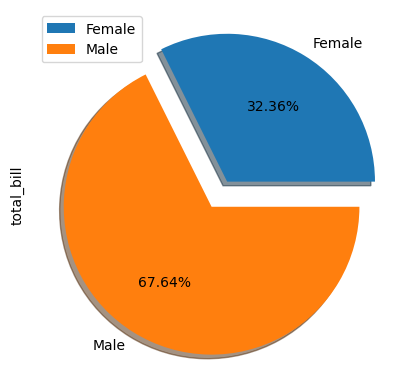

In [124]:
tips.groupby(['sex']).sum().plot(kind='pie', y='total_bill', shadow=True,explode=(0.1, 0.1), autopct='%1.2f%%');


In [ ]:
#Linear Regression

In [138]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,19.813868,3.002387,0.646091,0.621399,1.732510,0.275720,2.572016
std,8.910071,1.385002,0.479168,0.486040,1.152814,0.447799,0.952356
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.380000,2.000000,0.000000,0.000000,0.500000,0.000000,2.000000
50%,17.810000,2.920000,1.000000,1.000000,2.000000,0.000000,2.000000
75%,24.175000,3.575000,1.000000,1.000000,3.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000


In [162]:
x=tips[["total_bill"]]
y=tips[["tip"]]

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [220]:
print(x.shape, y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(243, 1) (243, 1)
(194, 1) (194, 1)
(49, 1) (49, 1)


In [221]:
model = LinearRegression()
    

In [222]:
model.fit(x_train,y_train) 

LinearRegression()

In [223]:
model.intercept_


array([1.03536932])

In [224]:
model.coef_

array([[0.09979095]])

In [225]:
Y_predict = model.predict(x_test)

In [226]:
Y_predict

array([[3.01322603],
       [1.91053599],
       [2.75776118],
       [2.11011789],
       [3.93230071],
       [4.3184917 ],
       [3.84448467],
       [2.43942804],
       [2.51027962],
       [3.42536266],
       [2.86054587],
       [4.03508539],
       [2.36059319],
       [6.10574768],
       [2.04026423],
       [2.2987228 ],
       [4.31150633],
       [3.1888581 ],
       [2.67693051],
       [2.48433397],
       [3.10004416],
       [3.09605252],
       [2.85555632],
       [1.98837293],
       [3.10004416],
       [2.78270892],
       [2.06022242],
       [3.55808463],
       [2.66395769],
       [4.01412929],
       [1.75885374],
       [1.8077513 ],
       [2.81264621],
       [3.06012777],
       [2.72882181],
       [1.88558825],
       [3.75766654],
       [2.06720778],
       [2.44741132],
       [3.29763024],
       [2.08417225],
       [2.09814298],
       [4.83441093],
       [2.06620987],
       [1.78978893],
       [1.34172755],
       [4.19974047],
       [2.900

In [227]:
y_test

,tip
24,3.18
6,2.00
152,2.74
233,1.47
239,5.92
175,3.11
216,3.00
150,2.50
9,3.23
113,2.55


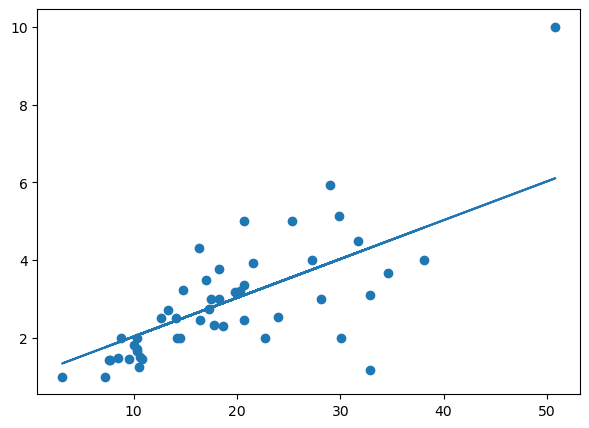

In [237]:
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(x_test,y_test)
ax.plot(x_test,Y_predict)


In [241]:
mean_absolute_error(y_test,Y_predict)

0.7565505996715424

In [242]:
mean_absolute_percentage_error(y_test,Y_predict)

0.3056279140488059

In [243]:
mean_squared_error(y_test,Y_predict)

1.1507520570798673

In [244]:
mean_squared_error(y_test,Y_predict,squared=False)

1.0727311205888768

In [258]:
r2_score(y_test,Y_predict) 

0.5200756159874647

In [ ]:
#Multiple Liear Regression 

In [137]:
tips["sex"]=tips["sex"].map({'Female':0, 'Male':1})
tips["time"]=tips["time"].map({'Dinner':0, 'Lunch':1})
tips["day"]=tips["day"].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3 })
tips["smoker"]=tips["smoker"].map({'Yes':0, 'No':1})

In [245]:
x=tips[["total_bill","sex","time","day","size","smoker"]]
y=tips[["tip"]]

In [246]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)


In [247]:
print(x.shape, y.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(243, 6) (243, 1)
(194, 6) (194, 1)
(49, 6) (49, 1)


In [248]:
model1 = LinearRegression()
model1.fit(x_train, y_train)


LinearRegression()

In [249]:
print(model1.intercept_)  #Having a look at the coefficients that the model has chosen:

print(model1.coef_)

[0.55045523]
[[0.08554227 0.01833388 0.18868067 0.0719823  0.2112128  0.05426195]]


In [ ]:
#y = 0.55 + 0.08*total_bill+ 0.01*sex+ 0.18*time+ 0.07*day+ 0.21*size + 0.05*smoker

In [250]:
x_test

,total_bill,sex,time,day,size,smoker
24,19.82,1,0,2,2,1
6,8.77,1,0,3,2,1
152,17.26,1,0,3,3,1
233,10.77,1,0,2,2,1
239,29.03,1,0,2,3,1
175,32.90,1,0,3,2,0
216,28.15,1,0,2,5,0
150,14.07,1,0,3,2,1
9,14.78,1,0,3,2,1
113,23.95,1,0,3,2,1


In [251]:
Y_predict = model1.predict(x_test)

In [146]:
Y_predict  #Comparing the predicted value to the actual value:

array([[2.88488914],
       [2.01162932],
       [2.94909603],
       [2.11073156],
       [3.88394629],
       [4.02150244],
       [4.17683274],
       [2.46500337],
       [2.52573838],
       [3.31016104],
       [2.82599177],
       [3.91779288],
       [2.32544267],
       [5.69279507],
       [1.86602136],
       [2.34438876],
       [3.94353218],
       [3.10742585],
       [2.5782778 ],
       [2.45789728],
       [3.36340265],
       [3.16710203],
       [2.74973235],
       [2.00636999],
       [3.66493163],
       [2.68667296],
       [2.13994273],
       [3.27935413],
       [2.44091305],
       [4.43016498],
       [1.58007608],
       [1.79727652],
       [3.13537478],
       [2.87083206],
       [2.90595488],
       [1.96297752],
       [3.39679026],
       [2.06440251],
       [2.42624664],
       [3.07442267],
       [2.08849057],
       [2.12684868],
       [4.72923075],
       [2.33795418],
       [1.88085694],
       [1.16824742],
       [4.39639469],
       [2.999

In [252]:
y_test

,tip
24,3.18
6,2.00
152,2.74
233,1.47
239,5.92
175,3.11
216,3.00
150,2.50
9,3.23
113,2.55


In [254]:
mean_squared_error(y_test,Y_predict,squared=False)

1.0813527585957292

In [257]:
mean_absolute_error(y_test,Y_predict) #gabimi MAE

0.7641672884246029

In [255]:
r2_score(y_test,Y_predict) 

0.5200756159874647

In [256]:
mean_absolute_percentage_error(y_test,Y_predict) #MAPE

0.30063243580030813

In [ ]:
#DecisionTreeRegressor

In [148]:
x=tips[["total_bill","sex","time","day","size","smoker"]]
y=tips[["tip"]]

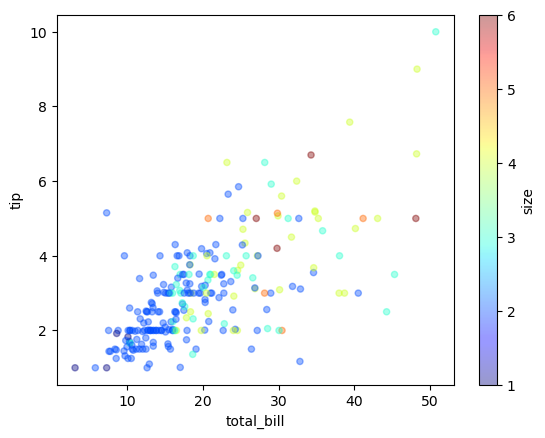

In [273]:
tips.plot(x='total_bill',y='tip',kind='scatter', c='size',alpha=0.4,colorbar=True,cmap=plt.get_cmap("jet"));

In [152]:
train_test_split(x,y,test_size=0.2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)  

In [153]:
print(x_train.shape) #nxjerim vlerat per secilin dataframe
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(194, 6)
(49, 6)
(194, 1)
(49, 1)


In [259]:
 model=DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [260]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=5)

In [261]:
y_pred=model.predict(x_test)

In [262]:
y_pred

array([2.760625  , 1.98690476, 2.760625  , 1.98690476, 3.66207547,
       4.64444444, 3.66207547, 2.39777778, 2.39777778, 3.66207547,
       2.760625  , 3.66207547, 2.39777778, 7.865     , 1.98690476,
       1.98690476, 4.64444444, 3.66207547, 2.760625  , 2.39777778,
       3.66207547, 3.66207547, 2.760625  , 1.98690476, 3.66207547,
       3.38727273, 1.98690476, 3.66207547, 3.38727273, 3.66207547,
       1.98690476, 1.98690476, 2.760625  , 3.38727273, 2.760625  ,
       1.98690476, 3.66207547, 1.98690476, 2.39777778, 3.66207547,
       1.98690476, 1.98690476, 4.64444444, 1.98690476, 1.98690476,
       1.98690476, 3.66207547, 2.760625  , 4.64444444])

In [263]:
y_test

,tip
24,3.18
6,2.00
152,2.74
233,1.47
239,5.92
175,3.11
216,3.00
150,2.50
9,3.23
113,2.55


In [264]:
y_test.mean()

tip    2.873265
dtype: float64

In [265]:
cv=KFold(n_splits=5,random_state=42, shuffle=True) #gabimet 

In [266]:
cv.split(x,y)

<generator object _BaseKFold.split at 0x000001C491565190>

[Text(0.5769230769230769, 0.875, 'total_bill <= 20.47\nsquared_error = 1.772\nsamples = 194\nvalue = 3.035'),
 Text(0.3076923076923077, 0.625, 'total_bill <= 16.28\nsquared_error = 0.667\nsamples = 121\nvalue = 2.441'),
 Text(0.15384615384615385, 0.375, 'total_bill <= 13.145\nsquared_error = 0.507\nsamples = 78\nvalue = 2.177'),
 Text(0.07692307692307693, 0.125, 'squared_error = 0.562\nsamples = 42\nvalue = 1.987'),
 Text(0.23076923076923078, 0.125, 'squared_error = 0.353\nsamples = 36\nvalue = 2.398'),
 Text(0.46153846153846156, 0.375, 'time <= 0.5\nsquared_error = 0.599\nsamples = 43\nvalue = 2.921'),
 Text(0.38461538461538464, 0.125, 'squared_error = 0.446\nsamples = 11\nvalue = 3.387'),
 Text(0.5384615384615384, 0.125, 'squared_error = 0.551\nsamples = 32\nvalue = 2.761'),
 Text(0.8461538461538461, 0.625, 'total_bill <= 48.22\nsquared_error = 2.051\nsamples = 73\nvalue = 4.019'),
 Text(0.7692307692307693, 0.375, 'total_bill <= 32.125\nsquared_error = 1.644\nsamples = 71\nvalue = 3.

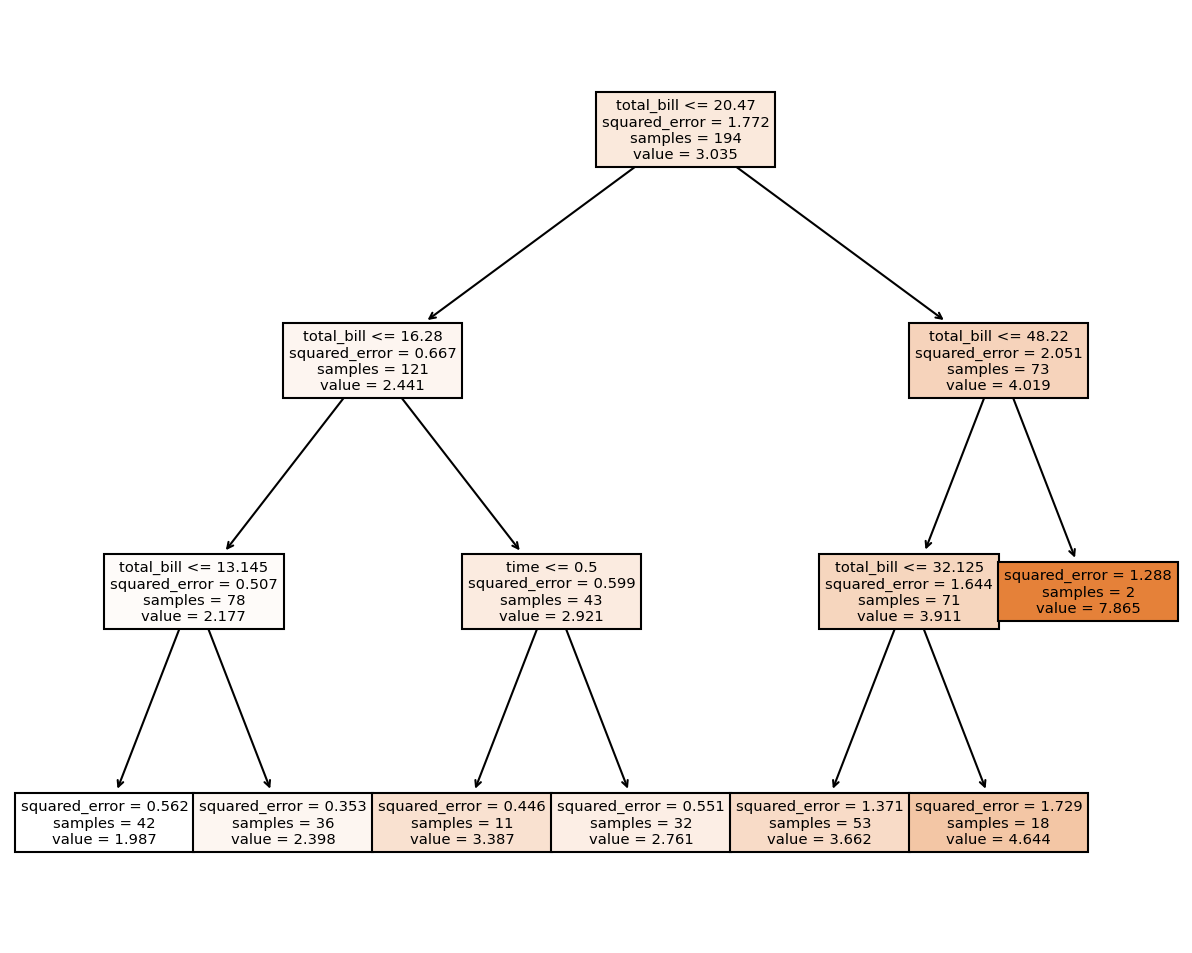

In [268]:
plt.figure(figsize=(10,8), dpi=150)
tree.plot_tree(model,filled=True,feature_names=tips.columns)

In [267]:
r2_score(y_test,y_pred)

0.5826419816728746

In [269]:
mean_absolute_error(y_test,y_pred) #gabimi MAE

0.7647416349534177

In [270]:
mean_absolute_percentage_error(y_test,y_pred) #MAPE

0.33295608827859713

In [271]:
mean_squared_error(y_test,y_pred) #MSE

1.0168823994319265

In [272]:
mean_squared_error(y_test,y_pred,squared=False)

1.0084058703874776